# Gradient Descent
### Kirill Zakharov

$f(\theta_1,\theta_2)=\theta_1^2+\theta_1\theta_2+\theta_2^2$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [15]:
def f(x, y):
    return x**2 + x*y + y**2

def grad_f(x):
    return np.array([2*x[0] + x[1], 2*x[1] + x[0]])

def dx(f, x, y, h):
    return (f(x + h, y) - f(x, y))/h

def dy(f, x, y, h):
    return (f(x, y + h) - f(x, y))/h

def grad(f, x, y, h):
    return (dx(f, x, y, h), dy(f, x, y, h))

In [16]:
init_values = np.array([1, 1])
n = 1000
eps = 0.00001

grad_f(init_values)

array([3, 3])

In [181]:
def gradient_descent(f, x0, y0, n, eps):
    t = 1
    x = x0
    y = y0
    
    step = 0.1
    
    x1 = x - step * grad(f, x, y, 0.001)[0]
    y1 = y - step * grad(f, x, y, 0.001)[1]
    
    x_array = [x1]
    y_array = [y1]
    
    while t < n and abs(f(x, y) - f(x1, y1)) > eps:
        x = x1
        y = y1
        
        x1 = x - step * grad(f, x, y, 0.001)[0]
        y1 = y - step * grad(f, x, y, 0.001)[1]
        t += 1
        
        x_array.append(x1)
        y_array.append(y1)
        
    return x_array, y_array, (x1, y1), f(x1, y1)

In [182]:
solution = gradient_descent(f, 1, 1, n, eps)

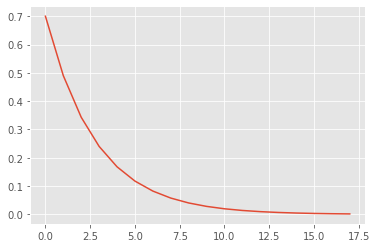

In [183]:
plt.plot(solution[1])

plt.show()

In [184]:
n = 1000
x = np.arange(n)/n + 0.1 * np.random.randn(n)
y = 10 * np.arange(n)/n + 1 + 0.1 * np.random.randn(n)

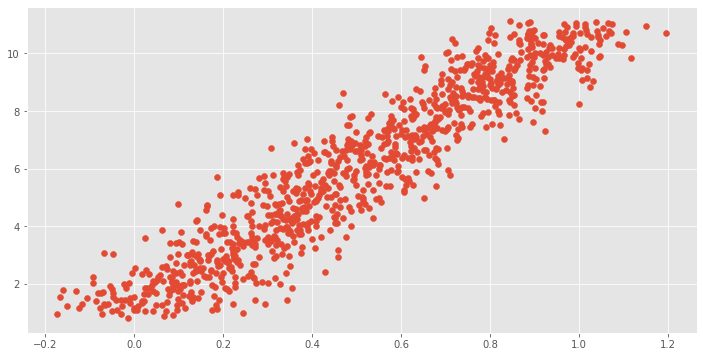

In [185]:
plt.subplots(figsize=(12, 6))
plt.scatter(x, y)
plt.show()

In [186]:
x_new = np.append(np.ones(n).reshape(-1, 1), x.reshape(-1, 1), axis=1)

In [187]:
def fun_Q(th0, th1):
    
    return np.mean((y - x_new.dot([th0, th1]))**2)/2

In [188]:
result = gradient_descent(fun_Q, 0, 0, 1000, 10**(-5))
th0, th1 = result[2]

In [189]:
print(f'Min: ({th0}, {th1})\nQuality Function: {fun_Q(th0, th1)}')

Min: (1.5310731077498196, 8.939770687541131)
Quality Function: 0.4669340201753334


In [190]:
y1 = np.dot(x_new, [th0, th1])

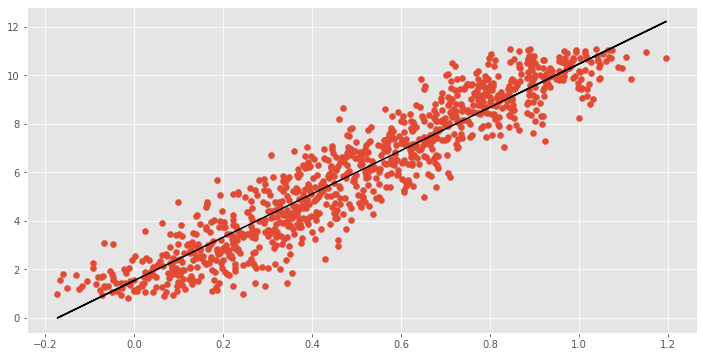

In [191]:
plt.subplots(figsize=(12, 6))

plt.plot(x, y1, c='black')
plt.scatter(x, y)
plt.show()

# Stochastic Gradient Descent

In [238]:
b = 200

n = 1000
x = np.arange(n)/n + 0.1 * np.random.randn(n)
y = 10 * np.arange(n)/n + 1 + 0.1 * np.random.randn(n)

rand_ind = np.random.randint(0, n, b)

xl = x[rand_ind]
yl = y[rand_ind]

x_new = np.append(np.ones(b).reshape(-1, 1), xl.reshape(-1, 1), axis=1)

x1 = np.append(np.ones(n).reshape(-1, 1), x.reshape(-1, 1), axis=1)

def fun_Q(th0, th1):
    
    return np.mean((yl - x_new.dot([th0, th1]))**2)/2

In [239]:
result = gradient_descent(fun_Q, 1, 1, 1000, 10**(-5))
th0, th1 = result[2]

In [240]:
print(f'Min: ({th0}, {th1})\nQuality Function: {fun_Q(th0, th1)}')

Min: (1.6667146443647476, 8.600728128552268)
Quality Function: 0.4377248064570569


In [241]:
y1 = np.dot(x1, [th0, th1])

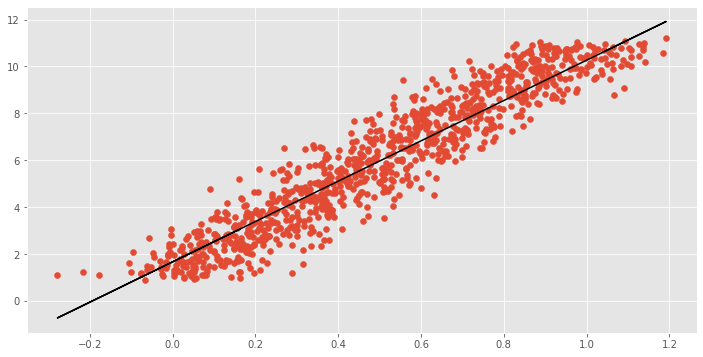

In [242]:
plt.subplots(figsize=(12, 6))

plt.plot(x, y1, c='black')
plt.scatter(x, y)
plt.show()